In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

In [12]:
df = pd.read_csv('../input/nyc-jobs.csv')
df.head(5)

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,Salary Range From,Salary Range To,Salary Frequency,Work Location,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,42405.00,65485.00,Annual,110 William St. N Y,Strategy & Analytics,Division of Economic & Financial Opportunity (...,1.\tA baccalaureate degree from an accredited ...,â€¢\tExcellent interpersonal and organizationa...,"Salary range for this position is: $42,405 - $...",NaN,NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-06-11T00:00:00.000
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,60740.00,162014.00,Annual,110 William St. N Y,Tech Talent Pipeline,The New York City Department of Small Business...,1. A baccalaureate degree from an accredited c...,NaN,NaN,"In addition to applying through this website, ...",NaN,NaN,NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-06-11T00:00:00.000
2,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,51907.68,54580.32,Annual,Heating Mgt-Operations,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-06-11T00:00:00.000
3,132292,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,51907.68,54580.32,Annual,Heating Mgt-Operations,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-06-11T00:00:00.000
4,133921,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,35.00,35.00,Hourly,DMP-Contract & Analysis Unit,Dept of Management & Planning,Responsibilities of selected candidates will i...,1. Five years of full-time satisfactory experi...,NaN,SPECIAL NOTE: 1. This is a temporary assig...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirement.,2014-01-09T00:00:00.000,NaN,2014-01-08T00:00:00.000,2019-06-11T00:00:00.000


In [13]:
df.shape

(3159, 28)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 28 columns):
Job ID                           3159 non-null int64
Agency                           3159 non-null object
Posting Type                     3159 non-null object
# Of Positions                   3159 non-null int64
Business Title                   3159 non-null object
Civil Service Title              3159 non-null object
Title Code No                    3159 non-null object
Level                            3159 non-null object
Job Category                     3157 non-null object
Full-Time/Part-Time indicator    2926 non-null object
Salary Range From                3159 non-null float64
Salary Range To                  3159 non-null float64
Salary Frequency                 3159 non-null object
Work Location                    3159 non-null object
Division/Work Unit               3159 non-null object
Job Description                  3159 non-null object
Minimum Qual Requirements    

**Part time and full time distribution**

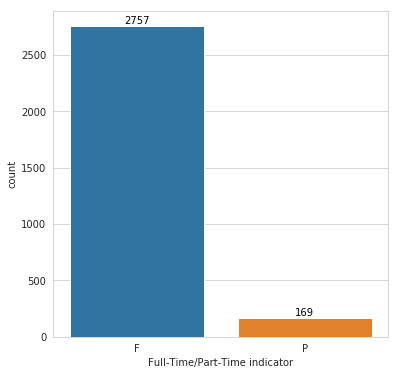

In [15]:
plt.figure(figsize=(6,6))
ax = sns.countplot(df['Full-Time/Part-Time indicator'])
sns.set_style('whitegrid')
for p in ax.patches:
     ax.text(p.get_x() + p.get_width()/2., p.get_height(),  '%d' % int(p.get_height()),
            fontsize=10, color='black', ha='center', va='bottom')

**Salary frequency distribution**

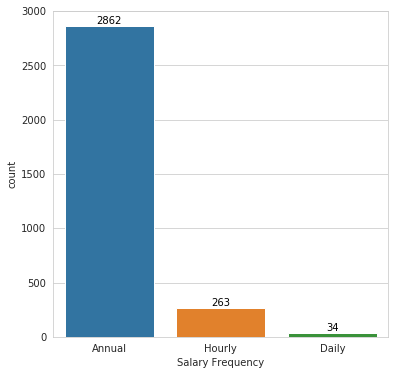

In [16]:
plt.figure(figsize=(6,6))
ax = sns.countplot(df['Salary Frequency'])
sns.set_style('whitegrid')
for p in ax.patches:
     ax.text(p.get_x() + p.get_width()/2., p.get_height(),  '%d' % int(p.get_height()),
            fontsize=10, color='black', ha='center', va='bottom')

Salary Range From	Salary Range To	Salary Frequency

**Analyzing Annual Income Jobs**

In [17]:
df2 = df[df['Salary Frequency'] == 'Annual']

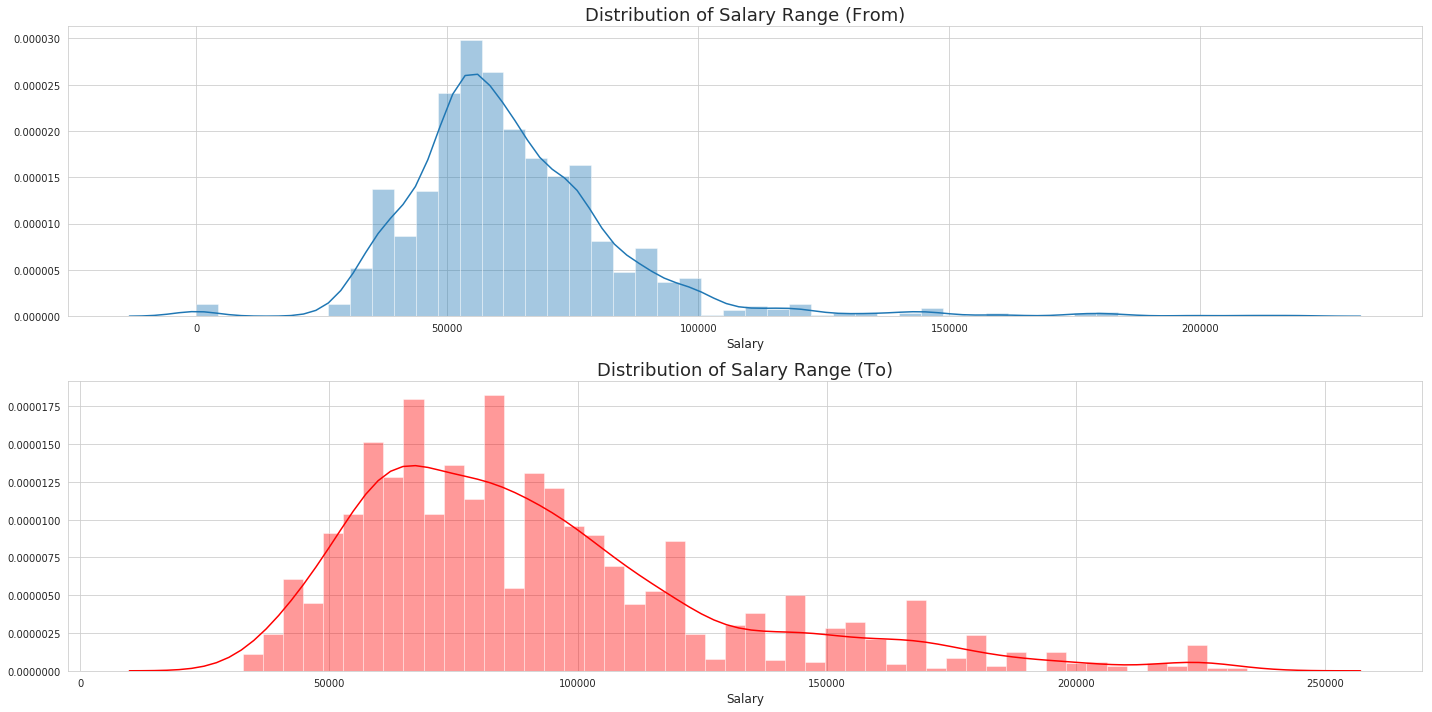

In [18]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')


plt.subplot(2, 1, 1)
sns.distplot(df2['Salary Range From'], bins=50)
plt.title('Distribution of Salary Range (From)', fontsize=18)
plt.xlabel('Salary', fontsize=12)

plt.subplot(2, 1, 2)
sns.distplot(df2['Salary Range To'], bins=50, color='r')
plt.title('Distribution of Salary Range (To)', fontsize=18)
plt.xlabel('Salary', fontsize=12)
plt.tight_layout()

**Most popular job titles**

Text(0.5, 1.0, 'Most popular job titles')

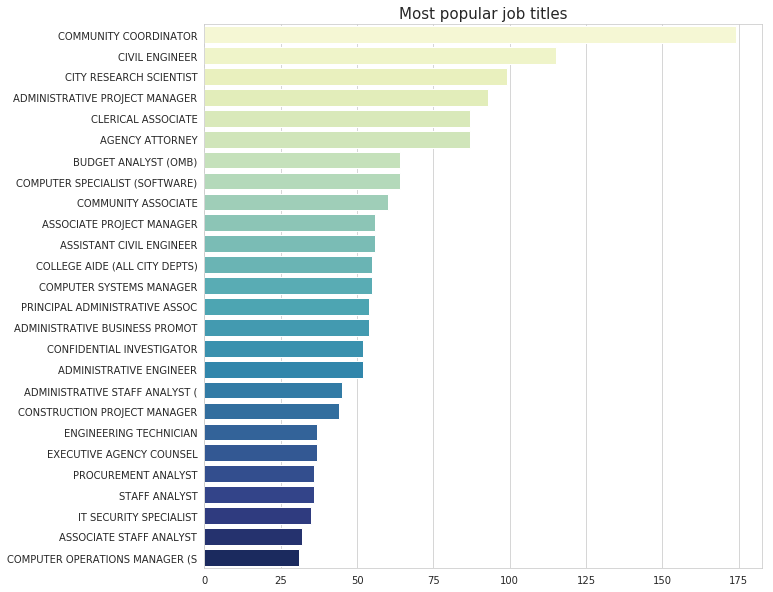

In [71]:
title= df['Civil Service Title'].value_counts().index
number = df['Civil Service Title'].value_counts().values
plt.figure(figsize=(10,10))
sns.barplot(x=number[0:26], y=title[0:26], data=df, palette='YlGnBu')
plt.title('Most popular job titles', fontsize=15)

**Most in-demand job categories**

Text(0.5, 1.0, 'Most in-demand job categories')

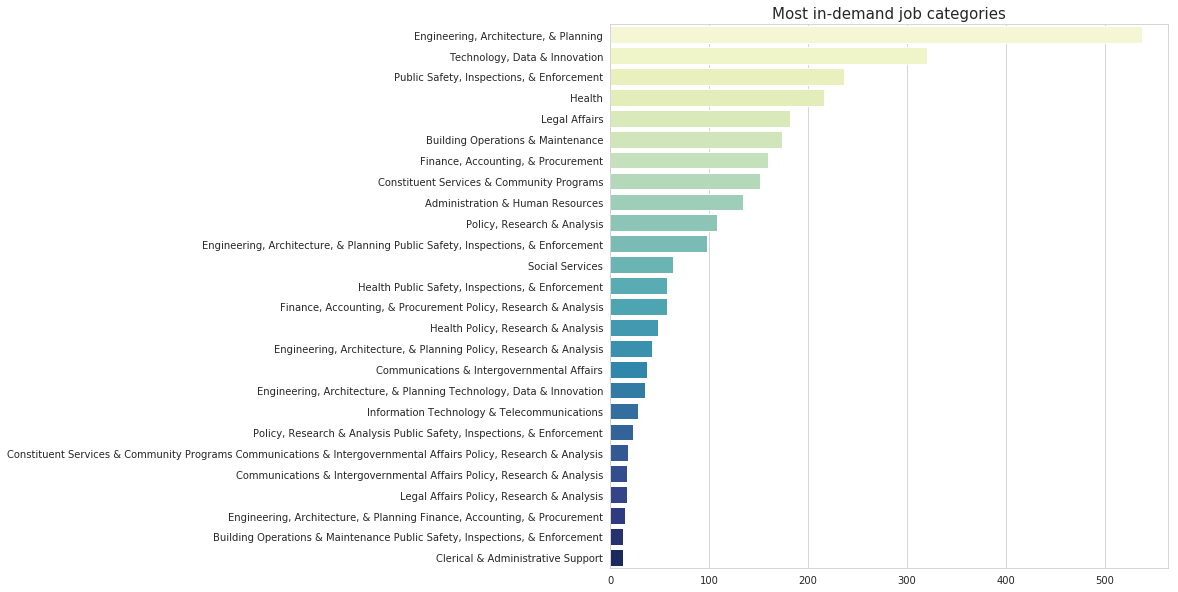

In [72]:
job= df['Job Category'].value_counts().index
num = df['Job Category'].value_counts().values
plt.figure(figsize=(10,10))
sns.barplot(x=num[0:26], y=job[0:26], data=df, palette='YlGnBu')
plt.title('Most in-demand job categories', fontsize=15)

**Jobs with highest high salary range (annual)**


In [61]:
df2 = df2.sort_values(by=['Salary Range To'], ascending=False)
df2.head()

,Civil Service Title,Salary Range To
2293,SENIOR GENERAL DEPUTY MANAGER,234402.0
2292,SENIOR GENERAL DEPUTY MANAGER,234402.0
1489,EXECUTIVE DEPUTY COMMISSIONER,230000.0
1490,EXECUTIVE DEPUTY COMMISSIONER,230000.0
2452,COMPUTER SYSTEMS MANAGER,225217.0


Text(0.5, 1.0, 'Jobs with highest high salary range (annual)')

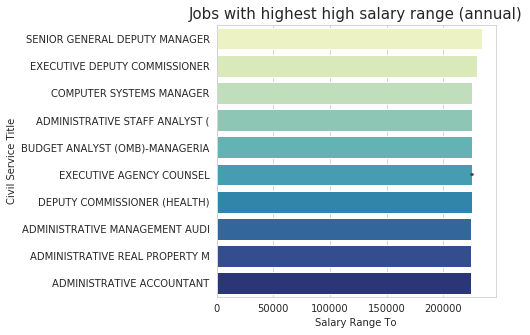

In [73]:
plt.figure(figsize=(5,5))
sns.barplot(x=df2['Salary Range To'][:21], y=df2['Civil Service Title'][:21], data=df2,palette='YlGnBu')
plt.title('Jobs with highest high salary range (annual)', fontsize=15)

**Analyze hourly basis jobs**

Highest paying jobs on an hourly basis

In [54]:
df3 = df[df['Salary Frequency'] == 'Hourly']
df3 = df3.iloc[:, [5,11]]
df3 = df3.sort_values(by=['Salary Range To'], ascending=False)

Text(0.5, 1.0, 'Highest paying jobs on an hourly basis')

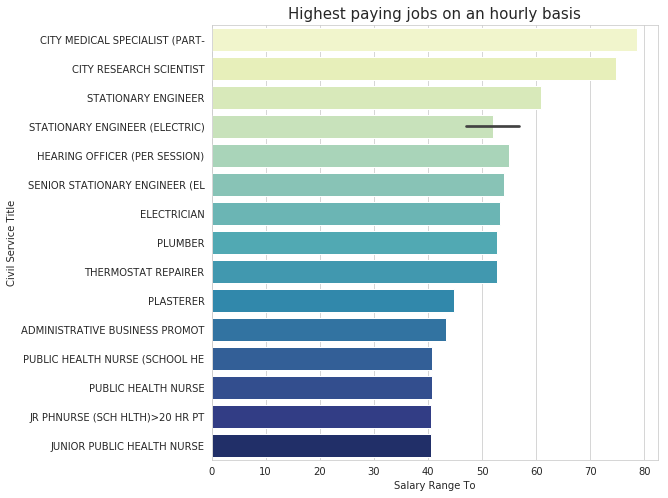

In [74]:
plt.figure(figsize=(8,8))
sns.barplot(x=df3['Salary Range To'][:51], y=df3['Civil Service Title'][:51], data=df3, palette='YlGnBu')
plt.title('Highest paying jobs on an hourly basis', fontsize=15)

**Most popular preferred skills per job category¶**


In [81]:
df4 = df['Agency'].value_counts().to_frame()
df4.head()

,Agency
DEPT OF ENVIRONMENT PROTECTION,691
DEPT OF HEALTH/MENTAL HYGIENE,363
DEPT OF DESIGN & CONSTRUCTION,265
NYC HOUSING AUTHORITY,197
DEPARTMENT OF TRANSPORTATION,160


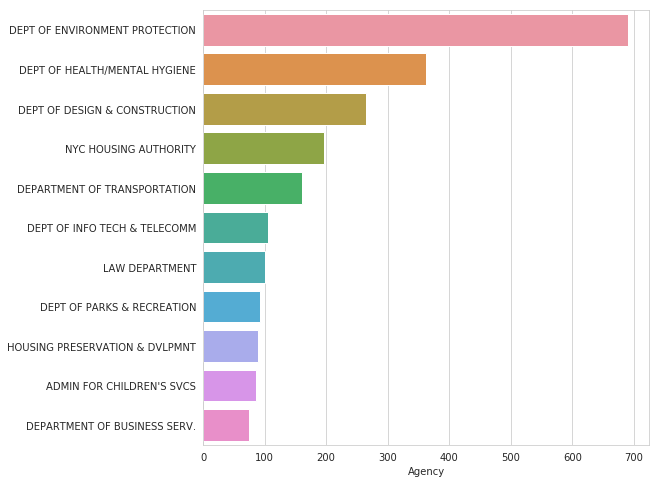

In [87]:
plt.figure(figsize=(8,8))
sns.barplot(x=df4['Agency'][:11], y=df4.index[:11])

In [92]:
df5 = df['Agency'].value_counts()

In [116]:
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
trace=[go.Bar(
        x=df5.index[:11],
        y=df5.values[:11], 
        marker= dict(colorscale='Viridis', color=df5.values[:11]),
        text='Number counts', 
        )]

layout = go.Layout(title='Top agencies', xaxis=dict(tickangle=-45, tickfont=dict(
            family='Old Standard TT, serif',
            size=6,
            color='black'
        )))
fig = go.Figure(data=trace, layout=layout)
py.iplot(fig)